12. Implement Batch Gradient Descent with early stopping for **Softmax Regression**
(without using Scikit-Learn).

In [4]:
from sklearn.datasets import load_iris
data = load_iris()
type(data)

sklearn.utils.Bunch

In [5]:
X, y = data["data"][:, (2,3)], data["target"]

Adding the bias term for every instance ($x_0 = 1$)

In [7]:
import numpy as np
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [10]:
X, X_with_bias;

In [11]:
np.random.seed(2042)

Manual!

In [37]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

Target indices are (0, 1, 2), but Softmax works with probilities. Each instance will have a class probability equal to 0.0 except for the target class which will have a probability of 1.0. This can easily be done by the `OneHotEncoder` class from `sklearn`.

In [38]:
def to_one_hot(y):
    n_classes = y.max() + 1 # We know that the index starts at 0.
    m = len(y)
    one_hot = np.zeros((m, n_classes))
    one_hot[np.arange(m), y] = 1
    return one_hot

Creating the target class probabilities matrix for training set and the test set.

In [39]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

**The Softmax Function**

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{k}{\exp\left(s_j(\mathbf{x})\right)}}$

In [85]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

Define the number of inputs and outputs.

In [86]:
n_inputs = X_train.shape[1] # 2 features plus the bias term
n_outputs = len(np.unique(y_train)) # 3 (the three iris classes)

**That which happens under the hood.

The cost function:

$J\left(\mathbf{\Theta}\right) = -\dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{k}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

In [87]:
theta = np.random.randn(n_inputs, n_outputs);

In [88]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 7.142167768754509
500 0.399199545233846
1000 0.3046966344952895
1500 0.26064756342233186
2000 0.2332886721674901
2500 0.21405991311661063
3000 0.19959613775199642
3500 0.188231058057316
4000 0.17901942784604005
4500 0.1713757314506246
5000 0.1649142686936288


In [89]:
Theta

array([[ 8.45173774,  1.45431179, -9.46183877],
       [-1.3185932 ,  0.52682884,  1.17000531],
       [-3.35011895, -0.16719829,  4.45470369]])

In [90]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Adding $\ell_2$ regularization, and increase the `eta`

In [53]:
tt = np.random.randn(n_inputs, n_outputs)
tt[1:]

array([[ 0.22895573, -1.45277468, -0.15540549],
       [ 0.19542942,  0.08879694,  0.17192739]])

In [104]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:])) # The first term is the bias term, so not included.
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 4.660846501857565
500 1.169236437099333
1000 0.9257810621566084
1500 0.7827676992069789
2000 0.6985127870134775
2500 0.6468585921701888
3000 0.6135079015627406
3500 0.5908453452416749
4000 0.5747137119642883
4500 0.5627542897783503
5000 0.5535739147884818


The $\ell_2$ penalty makes the loss slightly higher than before, but this will probably generalize better.

In [105]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)
y_predict

array([1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0,
       0, 1, 2, 1, 0, 2, 2, 2])

In [106]:
Y_proba.shape, y_predict.shape

((30, 3), (30,))

In [107]:
accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Okay, it is worse, why?, not anymore.

Early stopping, for this we just need to measure the loss on the validation set at the every iteration and stop when the starts growing again.

In [108]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.341992641058955
500 0.5522919801871763
1000 0.5254341360327937
1500 0.5185780138900247
2000 0.5165998626177226
2500 0.5161336008367273
2698 0.5161089723524891
2699 0.5161089727059094 early stopping!


In [103]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

Visuals, :-)

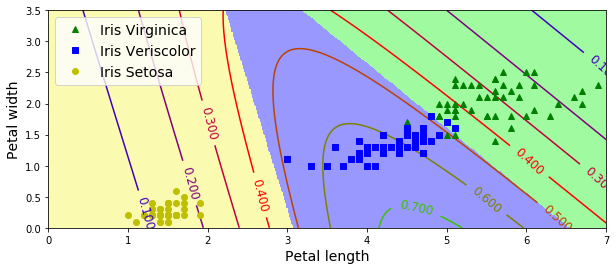

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris Veriscolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

The model's final accuracy.

In [112]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

1.0

What?!! A perfect score on the test set.

In [113]:
chr(0x1F603)

'😃'